# Depth-First Search (DFS)

In [2]:
from graphviz import Graph, Digraph

def example(num):
    g = mygraph()
    if num == 1:
        g.node("A")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "B")
    elif num == 2:
        g.edge("A", "B")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "E")
        g.edge("A", "E")
    elif num == 3:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
    elif num == 4:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
        g.edge("E", "Z")
        g.edge("C", "Z")
        g.edge("B", "A")
    elif num == 5:
        width = 8
        height = 4
        for L1 in range(height-1):
            L2 = L1 + 1
            for i in range(width-(height-L1-1)):
                for j in range(width-(height-L2-1)):
                    node1 = str(L1)+"-"+str(i)
                    node2 = str(L2)+"-"+str(j)
                    g.edge(node1, node2)
    else:
        raise Exception("no such example")
    return g

(A, B, E)


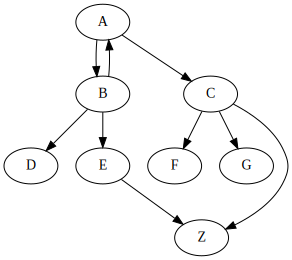

In [6]:
class mygraph:
    def __init__(self):
        # name => Node
        self.nodes = {}
        self.visited = set()
    
    def node(self, name):
        node = Node(name)
        self.nodes[name] = node
        node.graph = self
    
    def edge(self, src, dst):
        # automatically add missing nodes
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])
        
    def _repr_svg_(self):
        # draw nodes+edges, non-recursively!
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_svg_()
    
    def find(self, src, dst):
        self.visited = set()
        return self.nodes[src].find(self.nodes[dst])

class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.graph = None # back reference

    def __repr__(self):
        return self.name

    # DFS: yay!
    def find(self, dst):
        if self in self.graph.visited:
            return None
        self.graph.visited.add(self)
        
        if self == dst:
            return (self,)

        for child in self.children:
            childpath = child.find(dst)
            if childpath != None:
                return (self,) + childpath

        return None

g = example(4)
print(g.find("A", "E"))
g

# Breadth First Search (BFS)

TODO: [B]
CHECK B
True


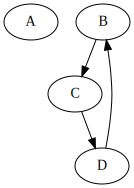

In [3]:
class mygraph:
    def __init__(self):
        # name => Node
        self.nodes = {}
        self.visited = set()
    
    def node(self, name):
        node = Node(name)
        self.nodes[name] = node
        node.graph = self
    
    def edge(self, src, dst):
        # automatically add missing nodes
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])
        
    def _repr_svg_(self):
        # draw nodes+edges, non-recursively!
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_svg_()
    
    def find(self, src, dst):
        self.visited = set()
        return self.nodes[src].find(self.nodes[dst])

class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.graph = None # back reference
        
    def __repr__(self):
        return self.name
    
    # BFS: not even recursive
    # version 1: just return True/False
    # version 2: return a path (like we did with DFS)
    def find(self, dst):
        todo = [self] # nodes to check (start from the front)
        while len(todo) > 0:
            print("TODO:", todo)
            curr = todo.pop(0)
            print("CHECK", curr)

            # 1. check it
            if curr == dst:
                return True
            
            # 2. add any new work we find to end of list
            for child in curr.children:
                todo.append(child)

        return False

g = example(1)
print(g.find("B", "B"))
g

# Example for Quiz

# Practice

False


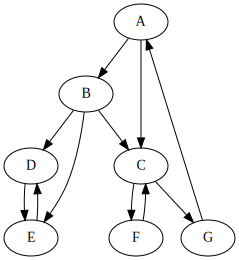

In [4]:
from graphviz import Graph, Digraph

class mygraph:
    def __init__(self):
        # name => Node
        self.nodes = {}
        self.visited = set()
    
    def node(self, name):
        node = Node(name)
        self.nodes[name] = node
        node.graph = self
    
    def edge(self, src, dst):
        # automatically add missing nodes
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])
        
    def _repr_svg_(self):
        # draw nodes+edges, non-recursively!
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_svg_()
    
    def find(self, src, dst):
        self.visited = set()
        return self.nodes[src].find(self.nodes[dst])
    
    def is_connected(self):
        for src in self.nodes.keys():
            for dst in self.nodes.keys():
                if self.find(src, dst) == None:
                    return False
        return True

class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.graph = None # back reference

    def __repr__(self):
        return self.name

    def find(self, dst):
        if self in self.graph.visited:
            return None
        self.graph.visited.add(self)
        
        if self == dst:
            return (self,)

        for child in self.children:
            childpath = child.find(dst)
            if childpath != None:
                return (self,) + childpath

        return None

g = mygraph()
g.edge("A", "B")
g.edge("A", "C")
g.edge("B", "D")
g.edge("B", "E")
g.edge("C", "F")
g.edge("C", "G")
g.edge("F", "C")
g.edge("G", "A")
g.edge("D", "E")
g.edge("E", "D")
g.edge("B", "C")
print(g.is_connected())
g